In [1]:
import numpy
from matplotlib import pyplot
from scipy import integrate
%matplotlib inline
import math

# 1

In [2]:
N = 100
x_start,x_end = -1.5,1.5
y_start,y_end = -1.5,1.5
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y = numpy.meshgrid(x,y)

u_inf = 1.0
u_fs = u_inf*numpy.ones((N,N),dtype=float)
v_fs = numpy.zeros((N,N),dtype=float)
psi_fs = u_inf*Y*numpy.ones((N,N),dtype=float)

In [3]:
def sigma_af(s,t,u_inf):
    sigma = 10*u_inf*t*(0.5*0.2969/numpy.sqrt(s) - 0.126 - 2*0.3516*s + 3*0.2843*s**2 - 4*0.1015*s**3)
    return sigma

In [4]:
x_minimum,x_max = 0.01,1.0
t = 0.15

u_sheet = numpy.empty((N,N),dtype=float)
v_sheet = numpy.empty((N,N),dtype=float)
psi_sheet = numpy.empty((N,N),dtype=float)

# solve for strength and velocity/place sources and sinks
for i in range(N):
    for j in range(N):
        integrand = lambda s: sigma_af(s,t,u_inf)*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
        integrand=lambda s: sigma_af(s,t,u_inf)*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
        integrand=lambda s: sigma_af(s,t,u_inf)*numpy.arctan2(Y[i,j],(X[i,j]-s))
        psi_sheet[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
u=u_fs+u_sheet
v=v_fs+v_sheet
psi = psi_fs+psi_sheet

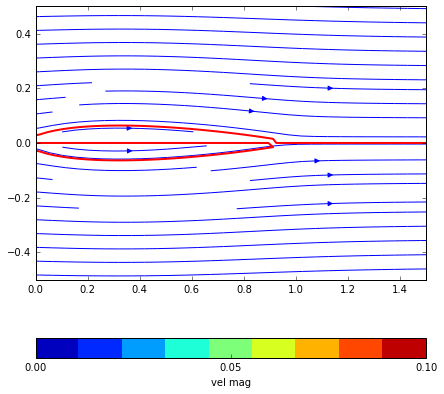

In [5]:
pyplot.figure(figsize=(7,7))
pyplot.xlim(0,x_end)
pyplot.ylim(-0.5,0.5)
pyplot.streamplot(X,Y,u,v,density=2)
pyplot.contour(X,Y,psi,levels=[0.],colors='r',linewidths=2)
#pyplot.axhline(0.0,(x_min)/(x_end), (x_max)/(x_end),color='r',linewidth=4)
velocity=pyplot.contourf(X,Y,numpy.sqrt(u**2+v**2), levels = numpy.linspace(0.0,0.1,10))
cbar = pyplot.colorbar(velocity,ticks=[0,0.05,0.1], orientation='horizontal')
cbar.set_label('vel mag')
pyplot.show()

# 2a

In [11]:
n = [0, 1, 2, 3, 4]
m = 0.02
p = 0.4
c = 1
B = numpy.zeros_like(n,dtype=float)

for i in range(5):
    integrand1 = lambda x: 2*m/p**2*(p-x/c)*numpy.cos(i*numpy.arccos(1-2*x))
    integrand2 = lambda x: 2*m/(1-p**2)*(p-x/c)*numpy.cos(i*numpy.arccos(1-2*x))
    B[i] = integrate.quad(integrand1,0,p*c)[0] + integrate.quad(integrand2,p*c,c)[0]

In [12]:
B

array([ 0.01142857,  0.01980952,  0.0039619 , -0.01002057, -0.00648168])

# 2b

In [13]:
# *Gamma* for camber line only, thickness = 0
def Gamma(s,alpha,u_inf):
    theta = numpy.arccos(1-2*s)
    Gamma = 2*u_inf*((numpy.radians(alpha)-B[0])*(1+numpy.cos(theta))/numpy.sin(theta) +\
        B[1]*numpy.sin(theta)+B[2]*numpy.sin(2*theta)+B[3]*numpy.sin(3*theta)+\
        B[4]*numpy.sin(4*theta))
    return Gamma

In [14]:
# alpha = 0
u_inf = 1
alpha = 0
u_fs1 = u_inf*numpy.cos(numpy.radians(alpha))
v_fs1 = u_inf*numpy.sin(numpy.radians(alpha))
psi_fs1 = u_inf*(Y*numpy.cos(numpy.radians(alpha)) - X*numpy.sin(numpy.radians(alpha)))

In [15]:
x_minimum,x_max = 0.05,1.0

u_sheet1 = numpy.empty((N,N),dtype=float)
v_sheet1 = numpy.empty((N,N),dtype=float)
psi_sheet1 = numpy.empty((N,N),dtype=float)

# solve for strength and velocity/place sources and sinks
for i in range(N):
    for j in range(N):
        integrand = lambda s: Gamma(s,alpha,u_inf)*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet1[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
        integrand=lambda s: Gamma(s,alpha,u_inf)*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet1[i,j] = -1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
        integrand=lambda s: Gamma(s,alpha,u_inf)*numpy.log(numpy.sqrt(Y[i,j]**2+(X[i,j]-s)**2))
        psi_sheet1[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
u1=u_fs1+u_sheet1
v1=v_fs1+v_sheet1
psi1 = psi_fs1+psi_sheet1

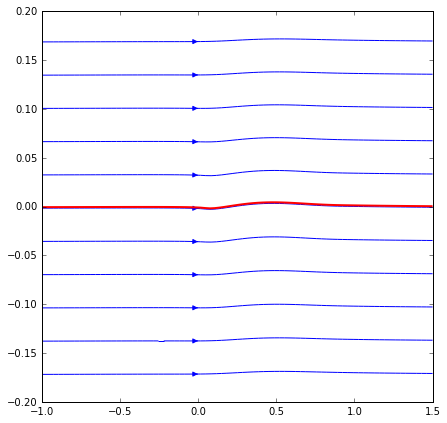

In [17]:
pyplot.figure(figsize=(7,7))
pyplot.xlim(-1.0,x_end)
pyplot.ylim(-0.2,0.2)
pyplot.streamplot(X,Y,u1,v1,density=3)
pyplot.contour(X,Y,psi1,levels=[0.],colors='r',linewidths=2)
#pyplot.axhline(0.0,(x_min)/(x_end), (x_max)/(x_end),color='r',linewidth=4)
#velocity=pyplot.contourf(X,Y,numpy.sqrt(u**2+v**2), levels = numpy.linspace(0.0,0.1,10))
#cbar = pyplot.colorbar(velocity,ticks=[0,0.05,0.1], orientation='horizontal')
#cbar.set_label('vel mag')
pyplot.show()

In [20]:
# alpha = 5
u_inf = 1
alpha = 5
u_fs2 = u_inf*numpy.cos(numpy.radians(alpha))
v_fs2 = u_inf*numpy.sin(numpy.radians(alpha))
psi_fs2 = u_inf*(Y*numpy.cos(numpy.radians(alpha)) - X*numpy.sin(numpy.radians(alpha)))

In [21]:
x_minimum,x_max = 0.01,1.0
t = 0

u_sheet2 = numpy.empty((N,N),dtype=float)
v_sheet2 = numpy.empty((N,N),dtype=float)
psi_sheet2 = numpy.empty((N,N),dtype=float)

# solve for strength and velocity/place sources and sinks
for i in range(N):
    for j in range(N):
        integrand = lambda s: Gamma(s,alpha,u_inf)*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet2[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
        integrand=lambda s: Gamma(s,alpha,u_inf)*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet2[i,j] = -1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
        integrand=lambda s: Gamma(s,alpha,u_inf)*numpy.log(numpy.sqrt(Y[i,j]**2+(X[i,j]-s)**2))
        psi_sheet2[i,j] = 1/(2*numpy.pi)*integrate.quad(integrand,x_minimum,x_max)[0]
        
u2=u_fs2+u_sheet2
v2=v_fs2+v_sheet2
psi2 = psi_fs2+psi_sheet2

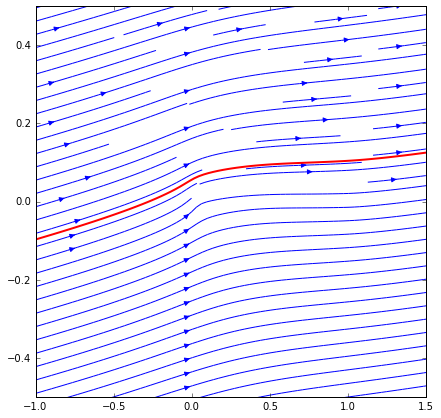

In [23]:
pyplot.figure(figsize=(7,7))
pyplot.xlim(-1.0,x_end)
pyplot.ylim(-0.5,0.5)
pyplot.streamplot(X,Y,u2,v2,density=3)
pyplot.contour(X,Y,psi2,levels=[0.],colors='r',linewidths=2)

pyplot.show()

# 2c

In [24]:
# lift for alpha = 0
c = 1
rho = 1
u_inf = 1
alpha = numpy.radians(0)
#theta = numpy.arccos(1-2*s)
gamma = lambda s: 2*u_inf*((numpy.radians(alpha)-B[0])*(1+numpy.cos(numpy.arccos(1-2*s)))/numpy.sin(numpy.arccos(1-2*s)) +\
        B[1]*numpy.sin(numpy.arccos(1-2*s))+B[2]*numpy.sin(2*numpy.arccos(1-2*s))+B[3]*numpy.sin(3*numpy.arccos(1-2*s))+\
        B[4]*numpy.sin(4*numpy.arccos(1-2*s)))
lift = rho*u_inf*integrate.quad(gamma,0,c)[0]

In [25]:
lift

-0.004787188805447799

In [26]:
# lift for alpha = 5
c = 1
rho = 1
u_inf = 1
alpha = numpy.radians(5)
#theta = numpy.arccos(1-2*s)
gamma = lambda s: 2*u_inf*((numpy.radians(alpha)-B[0])*(1+numpy.cos(numpy.arccos(1-2*s)))/numpy.sin(numpy.arccos(1-2*s)) +\
        B[1]*numpy.sin(numpy.arccos(1-2*s))+B[2]*numpy.sin(2*numpy.arccos(1-2*s))+B[3]*numpy.sin(3*numpy.arccos(1-2*s))+\
        B[4]*numpy.sin(4*numpy.arccos(1-2*s)))
lift = rho*u_inf*integrate.quad(gamma,0,c)[0]

In [27]:
lift

-2.269564661598244e-06

# 2d

In [28]:
# alpha for zero lift
alpha_0 = B[0] - B[1]/2
alpha_0

0.0015238095238095245

In [29]:
c = 1
rho = 1
u_inf = 1
alpha = alpha_0
#theta = numpy.arccos(1-2*s)
gamma = lambda s: 2*u_inf*((numpy.radians(alpha)-B[0])*(1+numpy.cos(numpy.arccos(1-2*s)))/numpy.sin(numpy.arccos(1-2*s)) +\
        B[1]*numpy.sin(numpy.arccos(1-2*s))+B[2]*numpy.sin(2*numpy.arccos(1-2*s))+B[3]*numpy.sin(3*numpy.arccos(1-2*s))+\
        B[4]*numpy.sin(4*numpy.arccos(1-2*s)))
lift = rho*u_inf*integrate.quad(gamma,0,c)[0]

In [30]:
# lift using theoretical 0-lift alpha
lift

-0.0047036365988775645

SO after calculating the theoretical 0-lift-angle-of-atk, and plugging into the K-J thm for lift, the resulting lift is not exactly 0, although it is quite small. This value is very close to the lift value for alpha = 0 deg. This makes sense since the theoretical value of 0-lift alpha is very small at 0.00152 radians (or 0.087 degrees). However, the alpha = 5 deg (0.0873 radians) gives an even smaller lift, which would suggest that 5 deg is closer to the 0-lift alpha.